# 0 - Importando as bibliotecas necessárias e carregando o dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

wine_df = pd.read_csv('winequality-white.csv', delimiter=';')

display(wine_df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


# 1 - Entendendo o Dataset

Analisando como está o dataset, quais as colunas ele tem, se tem algum valor faltante ou algum valor zerado que necessita de tratamento

In [ ]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


## Verificando valores faltantes

In [ ]:
wine_df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


## Verificando valores zerados

In [ ]:
zero_counts = (wine_df == 0).sum()
cols_with_zeros = zero_counts[zero_counts > 0]
print(cols_with_zeros)

citric acid    19
dtype: int64


Após pesquisar um pouco, vi que vinhos podem ter o valor acido do acido citrico zero então não vou considerar esses 19 valores como um erro.

## Verificando outliers

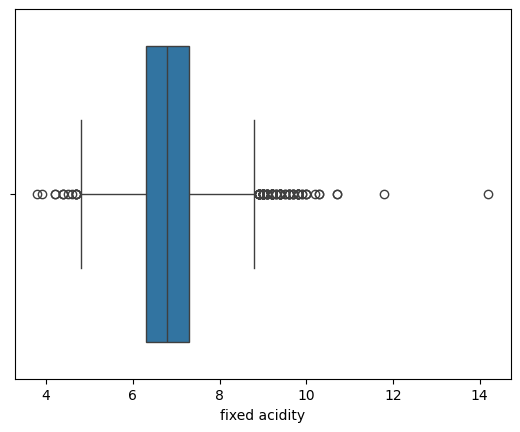

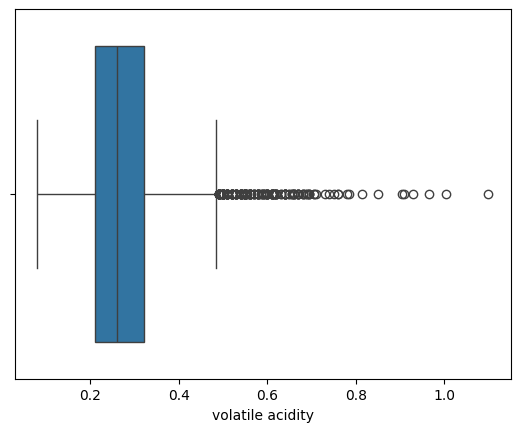

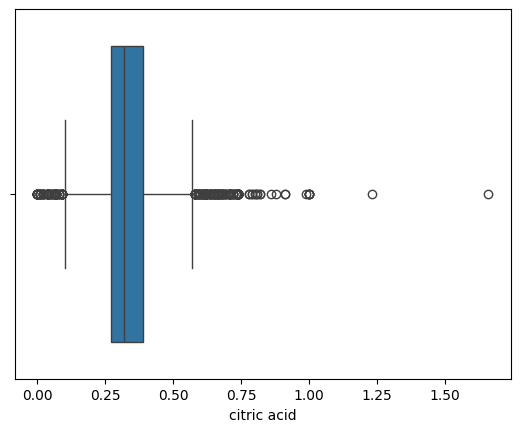

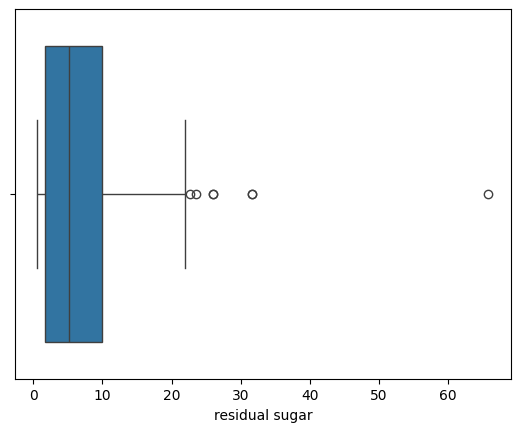

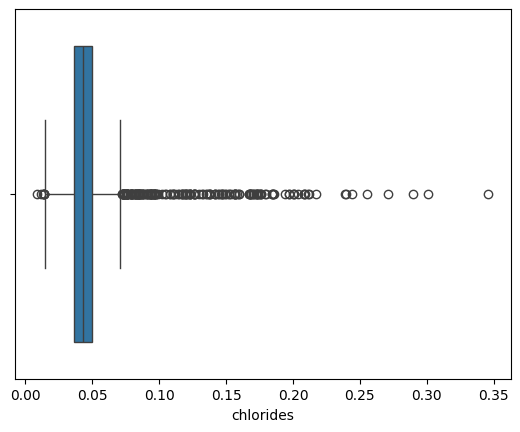

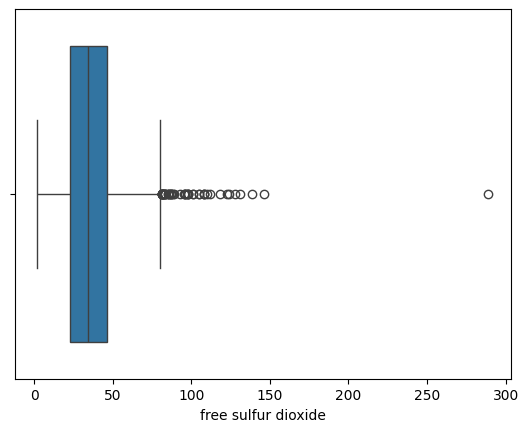

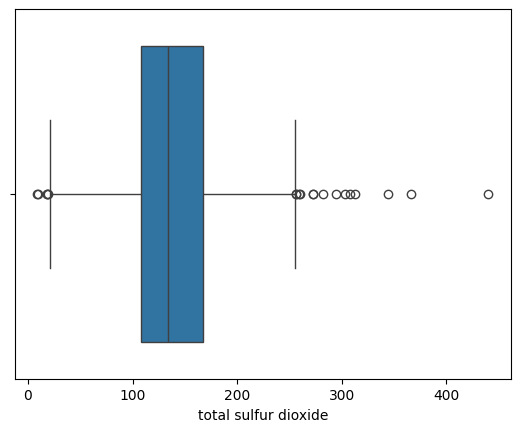

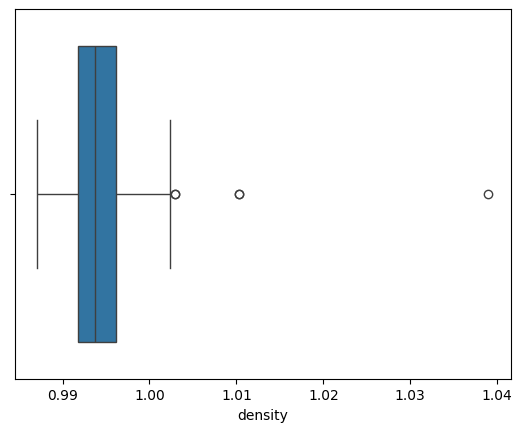

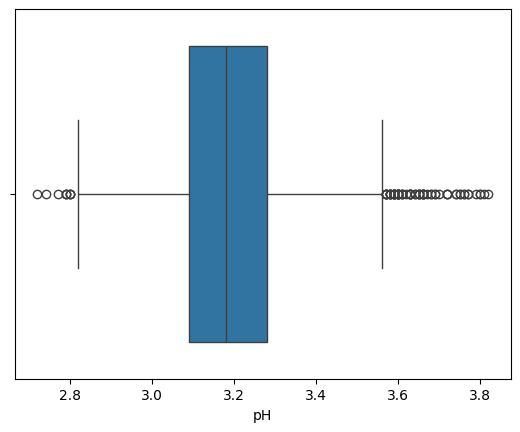

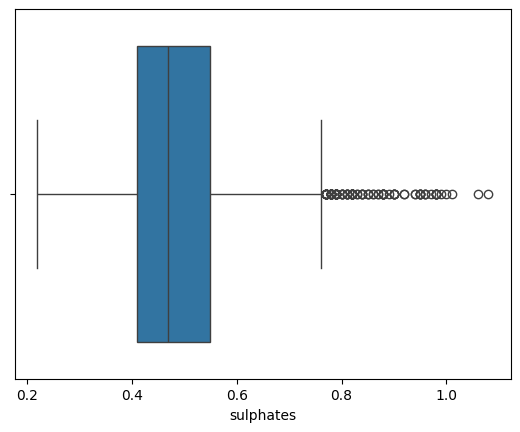

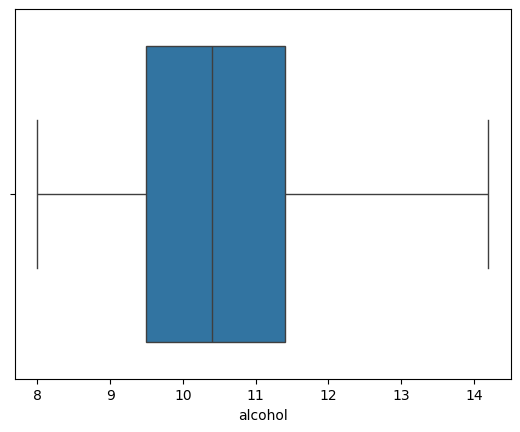

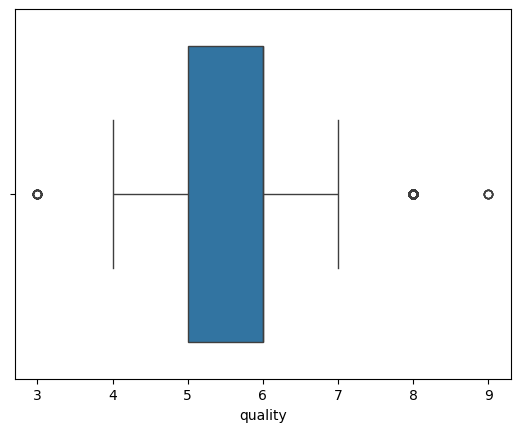

In [ ]:
for col in wine_df.columns:
  sns.boxplot(data=wine_df, x=wine_df[col])
  plt.show()

## Tratando Outliers

Como todas as colunas exceto `alcohol` tem outliers, iremos tratar todas elas utilizando o IQR

In [ ]:
wine_df_cleaned = wine_df.copy()

colunas_outliers = wine_df_cleaned.columns.to_list()
colunas_outliers.remove('alcohol')

print(colunas_outliers)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'quality']


In [ ]:
for col in colunas_outliers:
    Q1 = wine_df_cleaned[col].quantile(0.25)
    Q3 = wine_df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Atualiza o DataFrame removendo outliers da coluna atual
    wine_df_cleaned = wine_df_cleaned[(wine_df_cleaned[col] >= lower_bound) & (wine_df_cleaned[col] <= upper_bound)]

wine_df_cleaned.reset_index(drop=True, inplace=True)

In [ ]:
wine_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3815 entries, 0 to 3814
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3815 non-null   float64
 1   volatile acidity      3815 non-null   float64
 2   citric acid           3815 non-null   float64
 3   residual sugar        3815 non-null   float64
 4   chlorides             3815 non-null   float64
 5   free sulfur dioxide   3815 non-null   float64
 6   total sulfur dioxide  3815 non-null   float64
 7   density               3815 non-null   float64
 8   pH                    3815 non-null   float64
 9   sulphates             3815 non-null   float64
 10  alcohol               3815 non-null   float64
 11  quality               3815 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 357.8 KB


# 2 - Teste de Correlação

A seguir, faremos um teste de correlação para entender quais são as variáveis que tem maior correlação com a qualidade que é o objetivo (target) do modelo de regressão

In [ ]:
quality = wine_df_cleaned['quality']

def correlation_test(var):
  correlation = var.corr(quality)
  result = float(correlation)
  return result

In [ ]:
positive_corr = []

for column in wine_df_cleaned.columns[:-1]:
  if correlation_test(wine_df[column]) > 0:
    positive_corr.append(column)
  print(f'{column}: {correlation_test(wine_df[column])}')

fixed acidity: -0.023566560275180285
volatile acidity: 0.011334465835318216
citric acid: -0.03758619425503339
residual sugar: 0.033854502168357795
chlorides: 0.014448598100080645
free sulfur dioxide: 0.006156143435584335
total sulfur dioxide: 0.04446563750205826
density: 0.033632724107843744
pH: -0.00919283472204627
sulphates: 0.023018439030390768
alcohol: -0.035634781419326


# 3 - Preparando o modelo

## Separando variável alvo de variáveis preditoras

In [ ]:
# Separar variável alvo (y) e variáveis preditoras (X)
y = wine_df_cleaned['quality'] # Variável dependente
X = wine_df_cleaned.drop('quality', axis=1) # Variáveis independentes

## Dividindo dados de treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4 - Treinando o modelo

Primeiro, vamos testar um modelo de Regressão Linear

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Criar o modelo
modelo_linear = LinearRegression()

# Treinar o modelo com os dados de treino
modelo_linear.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Fazer previsões com os dados de teste
y_pred_linear = modelo_linear.predict(X_test)

# Avaliar o desempenho
r2_linear = r2_score(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)

# Exibir os resultados
print(f"R²: {r2_linear:.4f}")
print(f"MSE: {mse_linear:.4f}")
print(f"RMSE: {rmse_linear:.4f}")

R²: 0.2234
MSE: 0.4432
RMSE: 0.6657


# 5 - Testando outros modelos

A seguir, iremos testar para o mesmo dataset a Ridge Regression e o Random Forest Regressor. A escolha desses dois foi para a primeira porque na regressão linear tem dificuldade de lidar com variáveis que tenham pouco impacto (ruído)*, além disso, reduz o peso de variáveis irrelevantes, evita overfitting e pode melhorar a generalização em alguns casos. A segunda foi escolhida pois ela pode detectar relações mais complexas entre os dados (não lineares). Entre outras características ela também lida bem com distribuições assimétricas, outliers e variáveis que interagem entre si. Outro ponto forte é que pode funcionar bem mesmo sem normalizar os dados.

*foi observado no item 2 que há muitas variáveis com correlação negativa, acrescentando ruído ao dataset. Isso pode ter sido um fator que contribuiu para a baixa performance da Regressão Linear

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

## Regressão Ridge

In [ ]:
# Regressão Ridge
modelo_ridge = Ridge(alpha=1.0)
modelo_ridge.fit(X_train, y_train)
y_pred_ridge = modelo_ridge.predict(X_test)

r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

## Regressor Random Forest

In [ ]:
# Random Forest Regressor
modelo_rf = RandomForestRegressor(random_state=42)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

## Resultados

In [ ]:
print(f"Regressão Linear     → R²: {r2_linear:.4f} | MSE: {mse_linear:.4f} | RMSE: {rmse_linear:.4f}")
print(f"Regressão Ridge      → R²: {r2_ridge:.4f} | MSE: {mse_ridge:.4f} | RMSE: {rmse_ridge:.4f}")
print(f"Random Forest        → R²: {r2_rf:.4f} | MSE: {mse_rf:.4f} | RMSE: {rmse_rf:.4f}")

Regressão Linear     → R²: 0.2234 | MSE: 0.4432 | RMSE: 0.6657
Regressão Ridge      → R²: 0.2059 | MSE: 0.4531 | RMSE: 0.6732
Random Forest        → R²: 0.5034 | MSE: 0.2834 | RMSE: 0.5323


# 6 - Variáveis com correlação positiva

Agora, iremos testar novamente os algoritmos, porém com um dataset composto apenas pelas variáveis que tiveram correlação positiva no teste de correlação.

In [ ]:
y_2 = wine_df_cleaned['quality']
X_2 = wine_df_cleaned[positive_corr]

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X_2, y_2, test_size=0.2, random_state=42
)

## Regressão Linear

In [ ]:
# Regressão Linear
modelo_linear_2 = LinearRegression()
modelo_linear_2.fit(X_train_2, y_train_2)
y_pred_linear_2 = modelo_linear_2.predict(X_test_2)

# Avaliar o desempenho
r2_linear_2 = r2_score(y_test_2, y_pred_linear_2)
mse_linear_2 = mean_squared_error(y_test_2, y_pred_linear_2)
rmse_linear_2 = np.sqrt(mse_linear_2)

## Regressão Ridge

In [ ]:
# Regressão Ridge
modelo_ridge_2 = Ridge(alpha=1.0)
modelo_ridge_2.fit(X_train_2, y_train_2)
y_pred_ridge_2 = modelo_ridge_2.predict(X_test_2)

r2_ridge_2 = r2_score(y_test_2, y_pred_ridge_2)
mse_ridge_2 = mean_squared_error(y_test_2, y_pred_ridge_2)
rmse_ridge_2 = np.sqrt(mse_ridge_2)

## Regressor Random Forest

In [ ]:
# Random Forest Regressor
modelo_rf_2 = RandomForestRegressor(random_state=42)
modelo_rf_2.fit(X_train_2, y_train_2)
y_pred_rf_2 = modelo_rf_2.predict(X_test_2)

r2_rf_2 = r2_score(y_test_2, y_pred_rf_2)
mse_rf_2 = mean_squared_error(y_test_2, y_pred_rf_2)
rmse_rf_2 = np.sqrt(mse_rf_2)

## Resultados

In [ ]:
print(f"Regressão Linear     → R²: {r2_linear_2:.4f} | MSE: {mse_linear_2:.4f} | RMSE: {rmse_linear_2:.4f}")
print(f"Regressão Ridge      → R²: {r2_ridge_2:.4f} | MSE: {mse_ridge_2:.4f} | RMSE: {rmse_ridge_2:.4f}")
print(f"Random Forest        → R²: {r2_rf_2:.4f} | MSE: {mse_rf_2:.4f} | RMSE: {rmse_rf_2:.4f}")

Regressão Linear     → R²: 0.1975 | MSE: 0.4579 | RMSE: 0.6767
Regressão Ridge      → R²: 0.0455 | MSE: 0.5446 | RMSE: 0.7380
Random Forest        → R²: 0.4902 | MSE: 0.2909 | RMSE: 0.5393


# 7 - Conclusão

Após realizar os testes com o dataset completo e posteriormente utilizando apenas as colunas com correlação positiva, percebemos os 3 modelos se beneficiaram do dataset completo, mesmo que este contenha ruido e que mesmo as colunas com correlação negativa contribuiram pra capacidade de generalização dos 3 modelos.

Além disso, é possível que os resultados obtidos estejam de alguma forma relacionado com o tratamento dos outliers que foi o unico tratamento realizado neste dataset e portanto pode ter alterado os resultados dos modelos.